# Historical Analysis of Fortune 500 Companies' Profits

**Objective: To analyze how the profits of the largest companies in the US have changed historically.**

**Data Source: The dataset was sourced from Fortune’s public archive, capturing information about Fortune 500 companies spanning over 50 years since the list’s first publication in 1955.**

## Overview

In this notebook, I will:

* Explore the Dataset: Understand the basic structure of our dataset.
* Data Cleaning: Ensure the data is correct and suitable for analysis.
* Trend Analysis: Visualize the historical trend of average profits.
* Company Analysis: Identify which companies have been the most profitable over the years.
Before diving into the analysis, let's set up our environment by importing the necessary libraries.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")

I start by importing the necessary libraries for the analysis:
- **pandas**: For data manipulation and analysis.
- **matplotlib**: For creating static, interactive, and animated visualizations.
- **seaborn**: For making our charts more visually appealing. It's built on top of matplotlib and closely integrated with pandas data structures.

Note: It's common to also see `NumPy` imported in data analyses, but since `pandas` is built on top of `NumPy`, it automatically gets imported.

Next is to load the file fortune500.csv from the current working directory into a pandas DataFrame named df.

In [2]:
df = pd.read_csv('fortune500.csv')

To get an idea of the data structure, it's always a good idea to look at the first few rows.

In [3]:
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


To know how many rows and columns are there in the dataset and what data types they are:

In [5]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
print(df.columns)

Index(['year', 'rank', 'company', 'revenue', 'profit'], dtype='object')


In [6]:
print(df.shape)
print(df.info())

(25500, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25500 entries, 0 to 25499
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     25500 non-null  int64  
 1   rank     25500 non-null  int64  
 2   company  25500 non-null  object 
 3   revenue  25500 non-null  float64
 4   profit   25500 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 996.2+ KB
None


**Data Cleaning**

There’s something wrong with the profits column — I would expect it to be a float64 like the revenue column. This indicates that it probably contains some non-integer values

In [7]:
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


non_numberic_profits = df.profit.str.contains('[^0-9.-]')

This line checks each value in the profit column of the DataFrame df to see if it contains any characters that are NOT in the set {0, 1, ..., 9, ., -}. The regular expression [^0-9.-] matches any character that's not a digit, dot (decimal point), or hyphen (negative sign). The result is a Boolean Series where True indicates a non-numeric profit, and False indicates a numeric profit.

df.loc[non_numberic_profits].head()

This line uses the Boolean Series from the previous step to filter the rows of df where the profit column contains non-numeric values. The .head() function then limits the displayed result to the first five rows of this filtered DataFrame.

set(df.profit[non_numberic_profits]):
This line gets the unique non-numeric profit values from the DataFrame.

This analysis is useful when trying to clean a dataset and need to handle or remove non-numeric entries in a column that's supposed to be numeric.

In [8]:
set(df.profit[non_numberic_profits])

{'N.A.'}

In [9]:
len(df.profit[non_numberic_profits])

369

In [10]:
len(df)

25500

__Visualizing Irregularities in Profit Data__

I've identified non-numeric entries in the "profit" column. The histogram below showcases the distribution of these entries from 1955 to 2005, helping pinpoint problematic years in data collection.

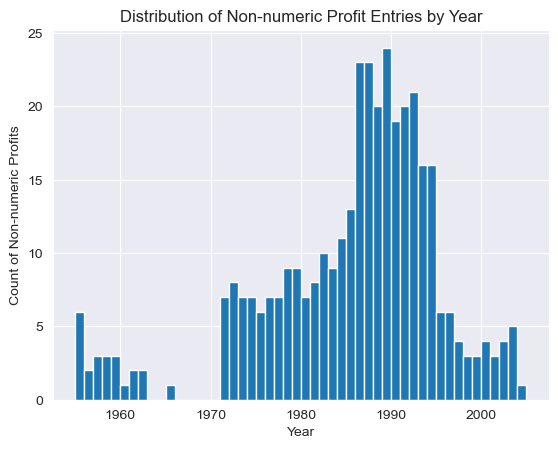

In [11]:
plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))
plt.xlabel('Year')
plt.ylabel('Count of Non-numeric Profits')
plt.title('Distribution of Non-numeric Profit Entries by Year')
plt.show()

In [12]:
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)

This code performs data cleaning on the df DataFrame by removing rows with non-numeric profits and then converting the 'profit' column to a numeric data type.

Here's a step-by-step explanation:

**df = df.loc[~non_numberic_profits]:**
    This line filters the df DataFrame to retain only the rows where non_numberic_profits is False. The ~ operator inverts the Boolean values, so rows where non_numberic_profits is True (i.e., rows with non-numeric profits) are excluded from the DataFrame.

**df.profit = df.profit.apply(pd.to_numeric):**
    After filtering out non-numeric rows, this line ensures that every value in the 'profit' column is treated as a number. The pd.to_numeric function is applied to each entry in the 'profit' column, converting them to appropriate numeric data types (either integer or float, depending on the nature of the data).

After executing these two lines of code, the df DataFrame will have all non-numeric profit rows removed, and the 'profit' column will be in a numeric format, making it suitable for mathematical operations and visualizations.

In [13]:
len(df)

25131

In [14]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

This code is preparing and defining a function to plot the average revenue and profit over the years for the Fortune 500 companies. Let's break it down step by step:

**group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year'):**
    This line subsets the original df DataFrame to include only the 'year', 'revenue', and 'profit' columns. It then groups the data by the 'year' column. The resulting group_by_year object is a GroupBy object that can be used to compute statistics for each year.

**avgs = group_by_year.mean():**
    This calculates the mean (average) of 'revenue' and 'profit' for each year. The result, avgs, is a DataFrame where the index is the unique years from the original data and the columns are the average 'revenue' and 'profit' for each year.

**x = avgs.index and y1 = avgs.profit:**
    These lines prepare the x and y data for plotting. x will contain the years and y1 will contain the average profits for those years.

**def plot(x, y, ax, title, y_label): ...:**
    This defines a custom plotting function named plot that:
        Takes in the x and y data to plot.
        An ax argument which is a Matplotlib axes object where the data will be plotted.
        A title for the plot.
        A y_label for labeling the y-axis.
        Inside the function, it sets the title, the y-axis label, plots the data, and sets the margins for better visualization.
        
## Upcoming Visualization:

In the following code cell, we will leverage our plotting function to visualize how the average profits of Fortune 500 companies have evolved over the dataset's time span. Peaks and troughs in the graph might offer insights into periods of economic boom or recession, changes in industry trends, or shifts in the business environment.

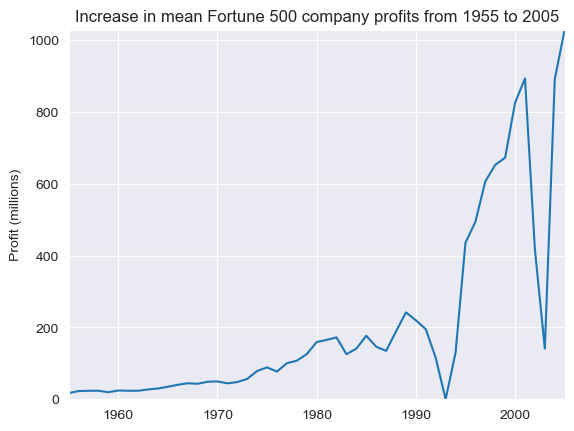

In [15]:
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

This observation suggests that while the average profits of Fortune 500 companies seem to generally increase over time, there are significant downturns that likely align with broader economic events, like the potential impact of the early 1990s recession and the dot-com bubble on the profits. The resilience and subsequent rise in profits post-recession could be attributed to several factors:

1. Diversification: Fortune 500 companies are usually diversified in their operations. While one sector or segment may face a downturn, others might still perform well or recover quickly.
2. Adaptability: Large corporations often have the resources and flexibility to adapt to changing economic environments, pivoting their strategies or entering new markets to maintain profitability.
3. Consolidation: Post-recession periods can sometimes lead to industry consolidation. Weaker players might exit, or mergers and acquisitions can lead to reduced competition and higher market shares for the remaining entities.
4. Globalization: Many Fortune 500 companies have a global presence, which can help buffer them against domestic economic downturns.

While profits give us an insight into the bottom line, revenues can help us understand the top line growth of Fortune 500 companies. If revenues also show a similar exponential growth, it might indicate an expanding market or increased consumer spending over the years. On the other hand, if revenues remain relatively stable but profits increase, it could point to improved operational efficiencies, cost management, or other strategic changes in the business landscape.
In the following analysis, we'll plot the average revenues of Fortune 500 companies over the years to see if it provides context to the observed profit trends.


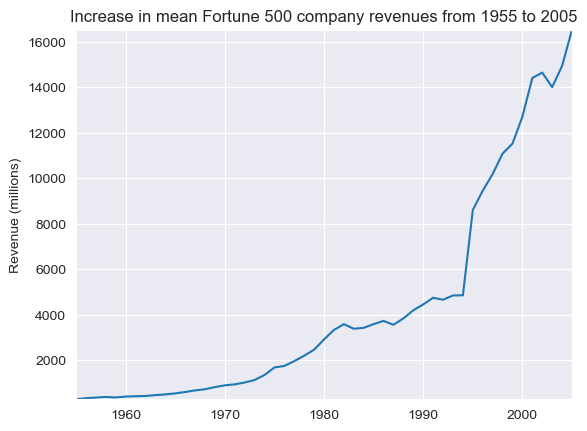

In [16]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

While profits took noticeable dips during certain periods (likely due to external economic events), revenues remained relatively stable or didn't decline as much. 
**Finance & Strategy at Play:** The ability to navigate profit downturns, while keeping revenues steady, indicates strategic decisions at play – be it cost-cutting, diversification, market expansion, or financial reengineering.

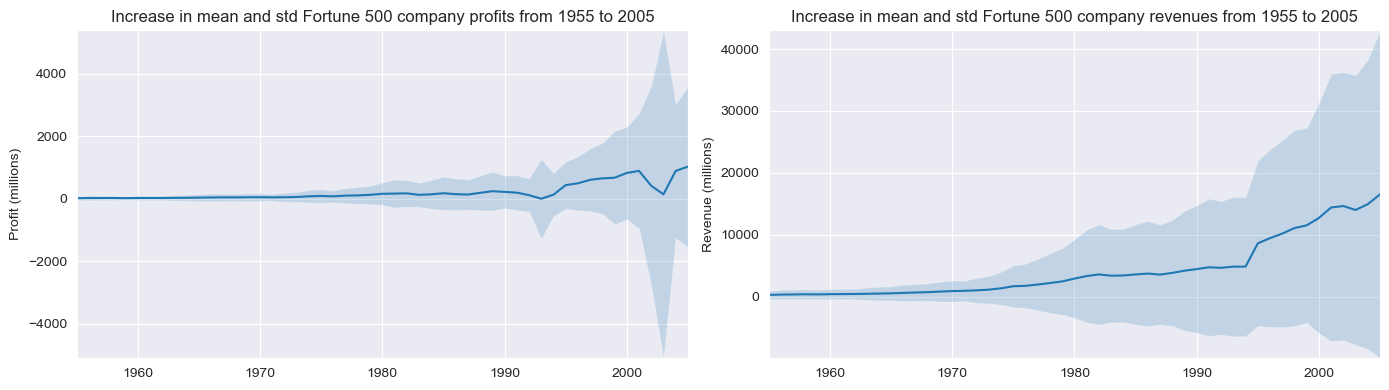

In [17]:
def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()

The provided code is an enhancement of the previous visualizations. It not only plots the mean (average) values of profits and revenues over the years but also overlays the standard deviations to give a sense of variability in the data. Standard deviation can offer insights into how spread out the values are from the mean, indicating the level of volatility or stability across Fortune 500 companies.

Let's break down the code:

**plot_with_std() function:**
This function creates a shaded region representing one standard deviation above and below the mean. This gives a sense of variability or dispersion of the data around the mean.
        The main line (mean) plot is then overlaid on this shaded region.

**fig, (ax1, ax2) = plt.subplots(ncols=2):**
        This initializes a new figure with two side-by-side subplots (ax1 and ax2).

**Calculating Standard Deviations:**
        stds1 and stds2 capture the standard deviations of profits and revenues, respectively, for each year.

**plot_with_std() for Profits and Revenues:**
        Uses the custom function to plot mean and standard deviations for both profits and revenues side by side.

**fig.set_size_inches(14, 4):**
        Sets the size of the entire figure to ensure the plots are clearly visible.

**fig.tight_layout():**
        Ensures that the plots and labels do not overlap.